### 9.2 用多项式回归法拟合复合函数曲线
使用八项式：

(1000, 8)
epoch=0
epoch=1
epoch=2
epoch=3
epoch=4
epoch=5
epoch=6
epoch=7
epoch=8
epoch=9
epoch=10
epoch=11
epoch=12
epoch=13
epoch=14
epoch=15
epoch=16
epoch=17
epoch=18
epoch=19
epoch=20
epoch=21
epoch=22
epoch=23
epoch=24
epoch=25
epoch=26
epoch=27
epoch=28
epoch=29
epoch=30
epoch=31
epoch=32
epoch=33
epoch=34
epoch=35
epoch=36
epoch=37
epoch=38
epoch=39
epoch=40
epoch=41
epoch=42
epoch=43
epoch=44
epoch=45
epoch=46
epoch=47
epoch=48
epoch=49
epoch=50
epoch=51
epoch=52
epoch=53
epoch=54
epoch=55
epoch=56
epoch=57
epoch=58
epoch=59
epoch=60
epoch=61
epoch=62
epoch=63
epoch=64
epoch=65
epoch=66
epoch=67
epoch=68
epoch=69
epoch=70
epoch=71
epoch=72
epoch=73
epoch=74
epoch=75
epoch=76
epoch=77
epoch=78
epoch=79
epoch=80
epoch=81
epoch=82
epoch=83
epoch=84
epoch=85
epoch=86
epoch=87
epoch=88
epoch=89
epoch=90
epoch=91
epoch=92
epoch=93
epoch=94
epoch=95
epoch=96
epoch=97
epoch=98
epoch=99
epoch=100
epoch=101
epoch=102
epoch=103
epoch=104
epoch=105
epoch=106
epoch=107
epoch=108
epoch=109


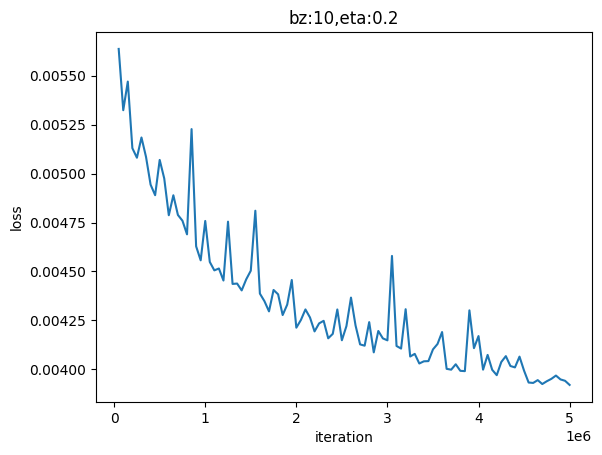

W= [[ -2.53994458]
 [ 10.04624263]
 [ -4.42048486]
 [-14.97586215]
 [ -0.80339045]
 [ 15.88446496]
 [ 13.77926531]
 [-16.3549733 ]]
B= [[-0.16225988]]


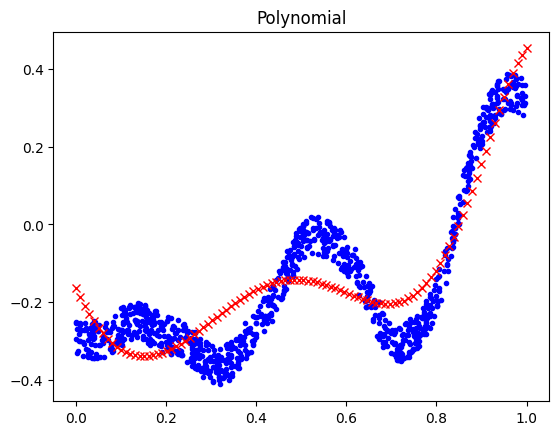

In [1]:
# Copyright (c) Microsoft. All rights reserved.
# Licensed under the MIT license. See LICENSE file in the project root for full license information.

import numpy as np
import matplotlib.pyplot as plt

from HelperClass.NeuralNet_1_2 import *

file_name = "ch09_2.train.npz"

class DataReaderEx(DataReader_1_3):
    def Add(self):
        X = self.XTrain[:,0:1]**2
        self.XTrain = np.hstack((self.XTrain, X))
        X = self.XTrain[:,0:1]**3
        self.XTrain = np.hstack((self.XTrain, X))
        X = self.XTrain[:,0:1]**4
        self.XTrain = np.hstack((self.XTrain, X))
        X = self.XTrain[:,0:1]**5
        self.XTrain = np.hstack((self.XTrain, X))
        X = self.XTrain[:,0:1]**6
        self.XTrain = np.hstack((self.XTrain, X))
        X = self.XTrain[:,0:1]**7
        self.XTrain = np.hstack((self.XTrain, X))
        X = self.XTrain[:,0:1]**8
        self.XTrain = np.hstack((self.XTrain, X))

def ShowResult(net, dataReader, title):
    # draw train data
    X,Y = dataReader.XTrain, dataReader.YTrain
    plt.plot(X[:,0], Y[:,0], '.', c='b')
    # create and draw visualized validation data
    TX1 = np.linspace(0,1,100).reshape(100,1)
    TX2 = np.hstack((TX1, TX1[:,]**2))
    TX3 = np.hstack((TX2, TX1[:,]**3))
    TX4 = np.hstack((TX3, TX1[:,]**4))
    TX5 = np.hstack((TX4, TX1[:,]**5))
    TX6 = np.hstack((TX5, TX1[:,]**6))
    TX7 = np.hstack((TX6, TX1[:,]**7))
    TX8 = np.hstack((TX7, TX1[:,]**8))
    TY = net.inference(TX8)
    plt.plot(TX1, TY, 'x', c='r')
    plt.title(title)
    plt.show()
#end def

if __name__ == '__main__':
    dataReader = DataReaderEx(file_name)
    dataReader.ReadData()
    dataReader.Add()
    print(dataReader.XTrain.shape)

    # net
    num_input = 8
    num_output = 1    
    hp = HyperParameters_1_1(num_input, num_output, eta=0.2, max_epoch=50000, batch_size=10, eps=1e-3, net_type=NetType.Fitting)
    #params = HyperParameters(eta=0.2, max_epoch=1000000, batch_size=10, eps=1e-3, net_type=NetType.Fitting)
    net = NeuralNet_1_2(hp)
    net.train(dataReader, checkpoint=500)
    ShowResult(net, dataReader, "Polynomial")
